https://arxiv.org/abs/2312.16171v1 에서LLM의 대화 주제와 프롬프트 엔지니어링에서는 다음과 같은 주제를 몀시했다.

각 원칙의 카테고리 구분 참고

Prompt Structure and Clarity 관련 원칙 : 2, 4, 12, 20, 17, 8

Specificity and Information 관련 원칙 : 7, 5, 13, 26, 24, 25, 15, 21

User Interaction and Engagement 관련 원칙 : 14, 21

Content and Language Style 관련 원칙 : 22, 9, 10, 16, 11, 1, 18, 6

Complex Tasks and Coding Prompts 관련 원칙 : 3, 23, 19

이에 
1. 학습/튜터링
수학 문제 풀이 (예: 기초 수학)

2. 창작/문서 작성
보고서/이메일 템플릿

3. 정보 문의
코퍼스 내 정보를 대답
 
4. 메타-프롬프트 (프롬프트 자체)
같은 질문에 스타일별 답변 실험

In [5]:
import json

data = {
  "학습/튜터링_기초수학": [
    {"user": "2x + 5 = 11 풀어줘", "model": "양변에서 5를 빼면 2x = 6. 따라서 x = 3."},
    {"user": "3x - 7 = 2 풀어줘", "model": "양변에 7을 더하면 3x = 9. 따라서 x = 3."},
    {"user": "5x = 20 풀어줘", "model": "양변을 5로 나누면 x = 4."},
    {"user": "x/3 = 6 풀어줘", "model": "양변에 3을 곱하면 x = 18."},
    {"user": "4x + 9 = 1 풀어줘", "model": "양변에서 9를 빼면 4x = -8. 따라서 x = -2."},
    {"user": "7x - 5 = 16 풀어줘", "model": "양변에 5를 더하면 7x = 21. 따라서 x = 3."},
    {"user": "9x + 4 = 31 풀어줘", "model": "양변에서 4를 빼면 9x = 27. 따라서 x = 3."},
    {"user": "x + 12 = 20 풀어줘", "model": "양변에서 12를 빼면 x = 8."},
    {"user": "10 - 2x = 4 풀어줘", "model": "양변에서 10을 빼면 -2x = -6. 따라서 x = 3."},
    {"user": "15 = 3x + 6 풀어줘", "model": "양변에서 6을 빼면 9 = 3x. 따라서 x = 3."}
  ],
  "창작/문서작성": [
    {"user": "실험 보고서 서론 예시를 써줘", "model": "본 실험은 전자회로의 기본 특성을 이해하기 위해 수행되었다. 이를 통해 저항, 전류, 전압의 관계를 분석하였다."},
    {"user": "실험 결과 보고서 결론 예시를 써줘", "model": "본 실험을 통해 저항과 전압의 관계가 이론과 일치함을 확인하였다. 이는 실험 과정의 신뢰성을 뒷받침한다."},
    {"user": "교수님께 과제 제출 지연 메일 예시 써줘", "model": "제목: 과제 제출 기한 연장 요청드립니다\n안녕하세요 교수님,\n개인 사정으로 이번 과제를 기한 내 제출하기 어렵습니다. 가능하시다면 제출 기한을 이틀 연장 부탁드립니다.\n감사합니다.\n홍길동 드림"},
    {"user": "인턴 지원 이메일 예시 써줘", "model": "제목: 인턴십 지원서 제출드립니다\n안녕하세요, 저는 ○○대학교 전자공학과 ○○○입니다.\n귀사 인턴십 프로그램에 관심이 있어 지원서를 첨부하여 제출드립니다.\n확인 부탁드립니다.\n감사합니다."},
    {"user": "팀 회의 보고서 예시를 써줘", "model": "제목: 9월 15일 팀 회의 보고\n- 진행 사항: 프로젝트 1차 완료\n- 향후 계획: 2차 기능 개발 시작\n- 기타 논의: 일정 조율 필요"},
    {"user": "협업 프로젝트 상황 보고서 예시를 써줘", "model": "본 프로젝트는 현재 60% 완료되었으며, 주요 기능 구현이 진행 중이다. 다음 주에는 테스트 단계에 진입할 예정이다."},
    {"user": "기업에 문의 이메일 예시 써줘", "model": "제목: 제품 문의드립니다\n안녕하세요, 귀사 제품 A에 대해 추가 정보가 필요하여 문의드립니다.\n사용 설명서와 가격 정보를 제공해주시면 감사하겠습니다."},
    {"user": "회의 초대 이메일 예시를 써줘", "model": "제목: 프로젝트 회의 초대\n안녕하세요, 다음 주 수요일 오후 2시에 회의를 진행하고자 합니다. 참석 부탁드립니다."},
    {"user": "발표 보고서 서론 예시를 써줘", "model": "본 발표는 최신 인공지능 기술 동향을 소개하고, 이를 응용한 사례를 설명하는 것을 목적으로 한다."},
    {"user": "업무 인수인계 문서 예시를 써줘", "model": "업무명: 고객 지원 관리\n현재 상태: 문의 처리율 95% 달성\n주의사항: 긴급 문의는 24시간 내 처리 필요"}
  ],
  "정보문의": [
    {"user": "BERT 논문에서 [MASK] 토큰은 어떻게 처리되나요?", "model": "80%는 [MASK]로 대체, 10%는 랜덤 토큰, 10%는 원래 토큰을 유지합니다."},
    {"user": "Transformer에서 positional encoding은 무엇을 하나요?", "model": "순서 정보가 없는 self-attention에 위치 정보를 더해주는 역할을 합니다."},
    {"user": "GPT는 어떤 방식으로 학습하나요?", "model": "다음 단어 예측(next-token prediction)으로 학습합니다."},
    {"user": "Attention 메커니즘의 핵심은 무엇인가요?", "model": "입력 단어들 간의 중요도를 계산해 가중합을 만드는 것입니다."},
    {"user": "LSTM의 장점은 무엇인가요?", "model": "긴 문맥 정보를 기억할 수 있고, RNN의 기울기 소실 문제를 줄여줍니다."},
    {"user": "Word2Vec의 목적은 무엇인가요?", "model": "단어를 벡터로 표현해 의미적 유사성을 반영하는 것입니다."},
    {"user": "Encoder-Decoder 구조는 어디에 쓰이나요?", "model": "번역, 요약 등 입력을 출력으로 변환하는 작업에 사용됩니다."},
    {"user": "Self-Attention과 Cross-Attention 차이는?", "model": "Self-Attention은 같은 시퀀스 내 관계, Cross-Attention은 다른 시퀀스 간 관계를 봅니다."},
    {"user": "CNN은 어떤 데이터에 주로 쓰이나요?", "model": "이미지 데이터 처리에 주로 사용됩니다."},
    {"user": "Dropout은 무엇을 하나요?", "model": "일부 뉴런을 확률적으로 꺼서 과적합을 방지합니다."}
  ],
  "메타프롬프트": [
    {"user": "\"인공지능이란 무엇인가?\" 간단히 대답해줘", "model": "컴퓨터가 사람처럼 학습하고 추론하는 기술."},
    {"user": "같은 질문을 논문체로 대답해줘", "model": "인공지능은 인간의 인지 과정을 모방하여 학습, 추론, 문제 해결을 수행하는 컴퓨터 과학의 한 분야이다."},
    {"user": "같은 질문을 친구한테 설명하듯 대답해줘", "model": "인공지능은 컴퓨터가 똑똑해져서 사람처럼 생각하고 배우는 거야."},
    {"user": "\"양자컴퓨터란?\" 초등학생 수준으로 설명해줘", "model": "양자컴퓨터는 보통 컴퓨터보다 빠른 계산을 할 수 있는 신기한 컴퓨터야."},
    {"user": "같은 질문을 전문가 수준으로 설명해줘", "model": "양자컴퓨터는 큐비트를 이용해 병렬적으로 연산을 수행하는 계산 모델로, 특정 문제에서 기존 컴퓨터보다 지수적으로 빠른 성능을 보일 수 있다."},
    {"user": "\"블록체인\" 한 문장으로 요약해줘", "model": "블록체인은 거래 기록을 여러 컴퓨터에 분산 저장하는 기술이다."},
    {"user": "같은 질문을 은유적으로 설명해줘", "model": "블록체인은 여러 명이 동시에 쓰는 장부를 모두가 함께 지켜보는 것과 같다."},
    {"user": "\"기계학습\"을 5살 어린이에게 설명해줘", "model": "컴퓨터가 스스로 공부해서 그림이나 말을 알아보는 거야."},
    {"user": "같은 질문을 교과서 스타일로 설명해줘", "model": "기계학습은 데이터로부터 패턴을 학습하여 새로운 입력을 예측하는 인공지능의 한 분야이다."},
    {"user": "같은 질문을 면접 답변처럼 해줘", "model": "기계학습은 데이터 기반으로 모델이 학습하여 스스로 예측할 수 있게 만드는 기술입니다. 저는 이 기술을 활용한 경험이 있습니다."}
  ]
}

# 파일로 저장
with open("fewshot_examples.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)


CoT 를 진행하기 위해 inference 부분에서 코드를 추가한다

In [ ]:
# CoT를 위한 새로운 PROMPT_DICT 정의
COT_PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):\n차근차근 생각해보자."
    )
}

list_prompt = [
    '불고기용 고기 한우에요?',
    '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
    '시카고 오헤어 국제공항은 어디에 있어',
    '오늘 미세먼지 어때?']

# CoT 프롬프트 형식에 맞게 list_prompt를 다시 생성
list_prompt_cot = [COT_PROMPT_DICT['prompt_input'].format_map({'prompt': tmp}) for tmp in list_prompt]

print("--- Zero-shot CoT 프롬프트 적용 결과 ---")
for input_text in list_prompt_cot:
    output = generation(input_text, actor) # 기존 generation 함수 사용

In [ ]:
def create_fewshot_prompt(examples, question):
    """
    Few-shot CoT 프롬프트를 생성하는 함수
    """
    prompt = ""
    # 예시 추가
    for category in examples:
        for ex in examples[category][:1]: # 각 카테고리별로 1개의 예시만 사용
            prompt += f"### Instruction(명령어):\n{ex['user']}\n\n"
            prompt += f"### Response(응답):\n{ex['model']}\n\n"

    # 실제 질문 추가
    prompt += f"### Instruction(명령어):\n{question}\n\n"
    prompt += "### Response(응답):\n차근차근 생각해보자."

    return prompt

# 이전에 저장한 fewshot_examples.json 파일을 로드했다고 가정
# with open("fewshot_examples.json", "r", encoding="utf-8") as f:
#     fewshot_examples = json.load(f)

# Few-shot CoT 프롬프트 생성
# question = "리처드 닉슨이 43대 부통령직을 수행한 년도는?"
# fewshot_prompt = create_fewshot_prompt(fewshot_examples, question)

# print("--- Few-shot CoT 프롬프트 ---")
# print(fewshot_prompt)

# print("\n--- Few-shot CoT 추론 결과 ---")
# generation(fewshot_prompt, actor)

Few-shot → Chain-of-thought → Zero-shot를 각각 넣고 빼면서 성능 비교

최종적으론 프롬프트 압축 및 최적화 실험을 진행하였다

추가적으로 데이터셋을 https://huggingface.co/datasets/MarkrAI/KoCommercial-Dataset/viewer/default/train 으로 교체한 다음, 샘플링해서 예제와 같은 방식으로 RM 데이터셋을 구성 한 뒤, 실험 을 진행하면 데이터의 차이로 모델 성능이 달라짐을 볼 수 있을것 같다.

+개인회고   
고잉디퍼 마지막 날에 그나마 실험다운 실험을 진행 할 수 있었다. 파인튜닝,SFT,RM,PPO등 2023년까지의 기술들을 배울수 있었고   
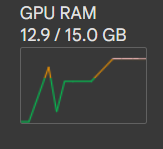  
OOM 문제도 colab 에서 처음 보는등, 리소스를 끝까지 쓴다는 느낌이 재미있었다